In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


def load_dataset():
  train_dataset = h5py.File('train_happy.h5', "r")
  test_dataset = h5py.File('test_happy.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:])
  train_set_y_orig = np.array(train_dataset["train_set_y"][:])
  test_set_x_orig = np.array(test_dataset["test_set_x"][:])
  test_set_y_orig = np.array(test_dataset["test_set_y"][:])
  classes = np.array(test_dataset["list_classes"][:])
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def norm(arr):
  min_val = np.min(arr)
  max_val = np.max(arr)
  normalized_arr = (arr - min_val) / (max_val - min_val)
  return normalized_arr

def split(x,y,test_ratio):
  x1, x2, y1, y2 = train_test_split(x,y, test_size = test_ratio)
  return x1, x2, y1, y2

def conv2D(x):
  total_elements_original = np.prod(x.shape)
  x = x.reshape((x.shape[0], total_elements_original //x.shape[0]))
  return x


# Load datasets
x, y, x_test, y_test, list_classes = load_dataset()
y= y.T
y_test = y_test.T

# Data Normalizing and Dimenssion Processing
x = conv2D(norm(x))
x_test = conv2D(norm(x_test))

# Spliting into train and Validation set
x_train, x_val, y_train, y_val = split(x,y,0.15)

train_size = [50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,510]
acc= list()

for i in train_size:
  svm_classifier = svm.SVC(kernel='linear')
  svm_classifier.fit(x_train[:i], y_train[:i])

  # Make predictions
  svm_predictions = svm_classifier.predict(x_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, svm_predictions)
  acc.append(accuracy)
print(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.84, 0.9133333333333333, 0.9066666666666666, 0.8733333333333333, 0.9066666666666666, 0.9, 0.9133333333333333, 0.9133333333333333, 0.9266666666666666, 0.92, 0.9333333333333333, 0.94, 0.94, 0.94, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9666666666666667]


<function matplotlib.pyplot.show(close=None, block=None)>

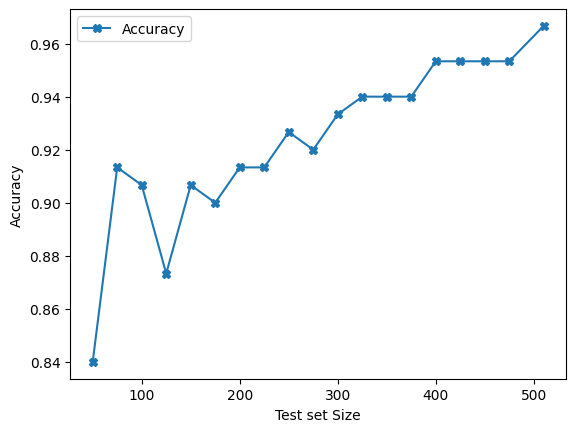

In [11]:
plt.plot(train_size, acc, marker = 'X', label= 'Accuracy')
plt.legend(loc = 'best')
plt.xlabel('Test set Size')
plt.ylabel('Accuracy')
plt.show